In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats


In [9]:
uniform_data = stats.uniform.rvs(size=100000,loc=0,scale=10)

(-1, 11)

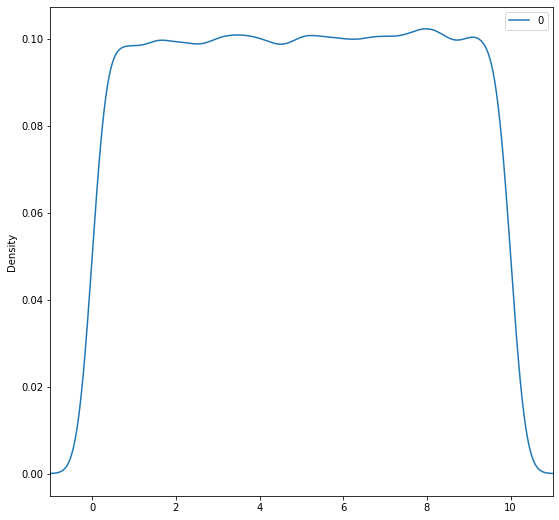

In [11]:
pd.DataFrame(uniform_data).plot(kind="density",figsize=(9,9))
plt.xlim(-1,11)

In [12]:
stats.uniform.cdf(x=2.5,loc=0,scale=10)

0.25

In [13]:
stats.uniform.ppf(q=0.4,loc=0,scale=10)

4.0

In [14]:
for x in range(-1,12,3):
    print("Density at x value" + str(x))
    print(stats.uniform.pdf(x,loc=0,scale=10))

Density at x value-1
0.0
Density at x value2
0.1
Density at x value5
0.1
Density at x value8
0.1
Density at x value11
0.0


GENERANDO NUMEROS RANDOM


In [16]:
import random
random.randint(0,10)

4

In [17]:
random.choice([2,4,6,9])

6

In [18]:
random.random()

0.5924044242610405

In [20]:
random.uniform(0,10)

3.559849123642201

In [22]:
random.seed(12)
print([random.uniform(0,10) for x in range(4)])
random.seed(12)
print([random.uniform(0,10) for x in range(4)])

[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]
[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]


DISTRIBUCIÓN NORMAL

In [28]:
prob_under_minus1 = stats.norm.cdf(x=-1,loc=0,scale=1)
prob_over_1 = 1 - stats.norm.cdf(x=1,loc=0,scale=1)
between_prob = 1 - (prob_under_minus1+prob_over_1)
print(prob_under_minus1,prob_over_1,between_prob)

0.15865525393145707 0.15865525393145707 0.6826894921370859


ValueError: operands could not be broadcast together with shapes (300,) (200,) 

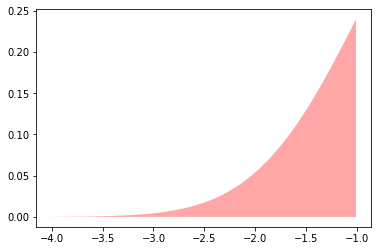

In [33]:
#plt.rcParams['figure.figsize' = (7,7)]
plt.fill_between(x=np.arange(-4,-1,0.01),
                 y1= stats.norm.pdf(np.arange(-4,-1,0.01)),
                 facecolor = 'red',
                 alpha = 0.35)
plt.fill_between(x = np.arange(1,4,0.01),
                 y1=stats.norm.pdf(np.arange(-1,1,0.01)),
                 facecolor = 'blue',
                 alpha = 0.35)
plt.fill_between(x=np.arange(1,4,0.01),
                 y1 = stats.norm.pdf(np.arange(1,4,0.01)),
                 facecolor='red',aplha=0.35)



plt.text(x=-1,y=0.03,s= round(prob_under_minus1,3))
plt.text(x=-0.2,y=0.2,s=round(between_prob,3))
plt.text(x=1.4,y=0.03,s=round(prob_over_1,3))

In [34]:
print(stats.norm.ppf(q=0.025))
print(stats.norm.ppf(q=0.975))

-1.9599639845400545
1.959963984540054


In [35]:
print(stats.norm.cdf(x=-3))
print(stats.norm.cdf(x=3))

0.0013498980316300933
0.9986501019683699


DISTRIBUCIÓN BINOMIAL

col_0   0    1    2     3     4     5     6     7    8    9   10
row_0                                                           
counts  14  120  437  1202  2045  2479  1997  1158  439  103   6


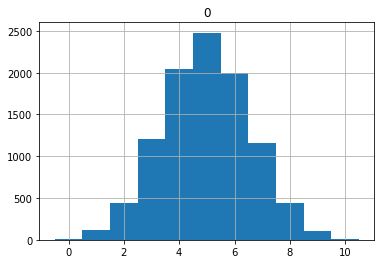

In [36]:
fair_coin_flips = stats.binom.rvs(n=10,p=0.5,size=10000)
print(pd.crosstab(index='counts',columns=fair_coin_flips))
pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5),bins=11);

col_0   3   4    5    6     7     8     9     10
row_0                                           
counts   5  63  284  846  2041  3039  2662  1060


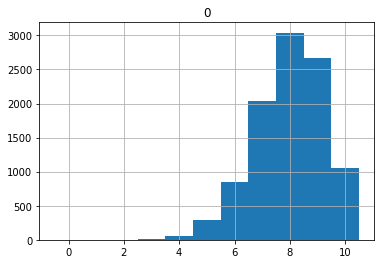

In [37]:
biased_coin_flips = stats.binom.rvs(n=10,p=0.8,size=10000)
#print table of counts
print(pd.crosstab(index='counts',columns = biased_coin_flips))
#plot histograms
pd.DataFrame(biased_coin_flips).hist(range=(-0.5,10.5),bins=11);

In [38]:
stats.binom.cdf(k=5,n=10,p=0.8)

0.032793497599999964

In [39]:
1 - stats.binom.cdf(k=8,n=10,p=0.8)

0.37580963840000003

col_0     1     2     3    4    5    6   7   8   9   10  11  12  13  15
row_0                                                                  
counts  4989  2481  1289  625  324  123  77  41  27   8   9   4   1   2


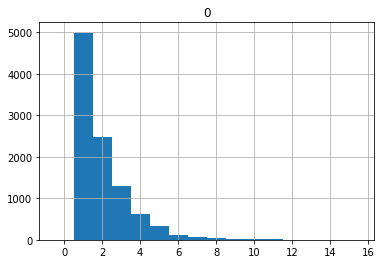

In [40]:
random.seed(12)
flips_till_heads = stats.geom.rvs(size=10000,p=0.5)
print(pd.crosstab(index='counts',columns=flips_till_heads))
pd.DataFrame(flips_till_heads).hist(range=(-0.5,max(flips_till_heads)+0.5),bins=max(flips_till_heads)+1);

In [41]:
first_five = stats.geom.cdf(k=5,p=0.5)
1 - first_five

0.03125

col_0      0     1     2    3    4   5  6  7  8
row_0                                          
counts  3655  3763  1748  652  148  29  3  1  1


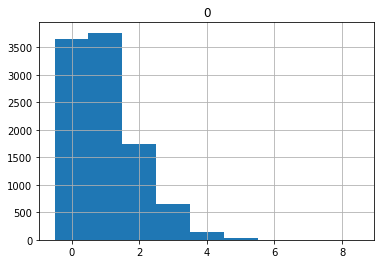

In [44]:
random.seed(12)
arrival_rate_1 = stats.poisson.rvs(size=10000,mu=1)
print(pd.crosstab(index='counts',columns=arrival_rate_1))
pd.DataFrame(arrival_rate_1).hist(range=(-0.5,max(arrival_rate_1)+0.5),
                                  bins=max(arrival_rate_1)+1);